# data

In [1]:
import pandas as pd
import pymongo
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
collection_tour_pass_visitor = db['data_tour_pass_visitor']
data_tour_pass_visitor = collection_tour_pass_visitor.find()
df_tour_pass = pd.DataFrame(data_tour_pass_visitor)

In [2]:
df_tour_pass.head()

,_id,date,visitor,region
0,664162f32581fd20a9efc7a8,201901,46600000,경기
1,664162f32581fd20a9efc7a9,201902,43800000,경기
2,664162f32581fd20a9efc7aa,201903,61439672,경기
3,664162f32581fd20a9efc7ab,201904,45141490,경기
4,664162f32581fd20a9efc7ac,201905,53300448,경기


In [3]:
df_tour_pass['region'].unique()

array(['경기', '강원', '부산', '제주'], dtype=object)

In [4]:
df_tour_pass.columns

Index(['_id', 'date', 'visitor', 'region'], dtype='object')

In [5]:
df_tour_pass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   _id      240 non-null    object
 1   date     240 non-null    int64 
 2   visitor  240 non-null    int64 
 3   region   240 non-null    object
dtypes: int64(2), object(2)
memory usage: 7.6+ KB


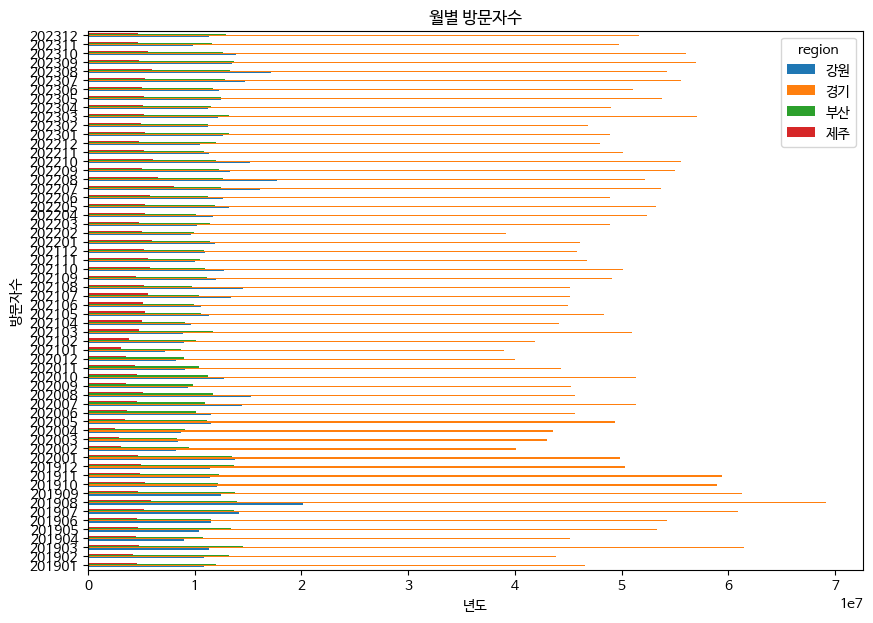

In [6]:
pivot_visitor = pd.pivot_table(data=df_tour_pass,index="date",columns = 'region',values='visitor', aggfunc='sum')
# ax = pivot_visitor.plot(kind='line',  figsize=(10, 7))
ax = pivot_visitor.plot(kind='barh',  figsize=(10, 7))
# ax = pivot_visitor.plot(kind='area',  figsize=(10, 7))
plt.title('월별 방문자수')
plt.xlabel('년도')
plt.ylabel('방문자수')
plt.show()

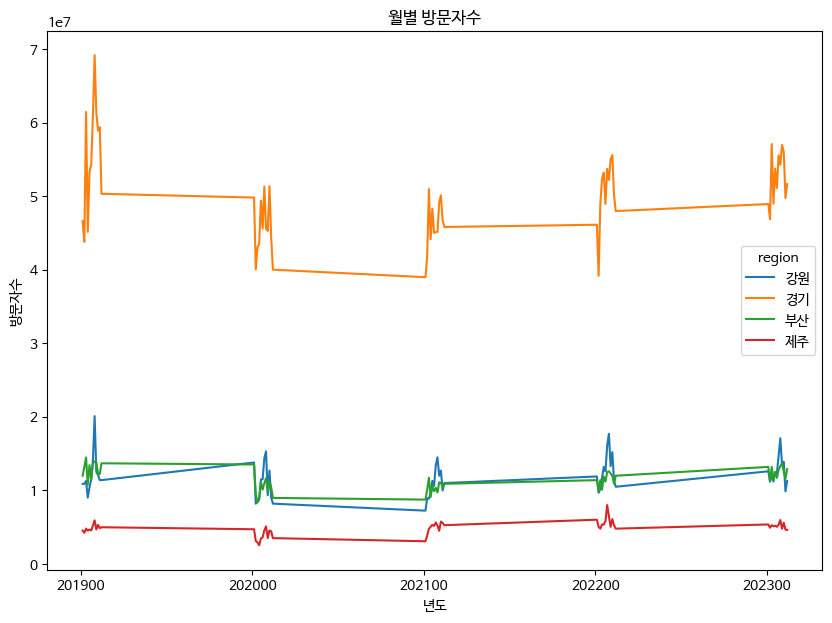

In [7]:
pivot_visitor = pd.pivot_table(data=df_tour_pass,index="date",columns = 'region',values='visitor', aggfunc='sum')
ax = pivot_visitor.plot(kind='line',  figsize=(10, 7))
# ax = pivot_visitor.plot(kind='barh',  figsize=(10, 7))
# ax = pivot_visitor.plot(kind='area',  figsize=(10, 7))
plt.title('월별 방문자수')
plt.xlabel('년도')
plt.ylabel('방문자수')
plt.show()

# 투어패스가 등장한 시점
- 강릉(강원) : 2023년 7월
- 경기 : 2023년 7월
- 부산 : 2022년 2월
- 제주 : 2021년 3월 

# 결과 : 코로나 바이러스가 활발한 시기인 2020년도 급감소 -> 2021년도부터 점차 증가

# 결론 : 투어패스 티켓만으로는 방문자수가 늘었다고 할수 없다.
